<a href="https://colab.research.google.com/github/Yong-Bin-Park/R/blob/main/r_study_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#14-1 MNIST 데이터셋 로드 및 구조 살피기
install.packages("keras")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(keras)

In [4]:
data_mnist <- dataset_mnist()

Loaded Tensorflow version 2.7.0



In [5]:
str(data_mnist)

List of 2
 $ train:List of 2
  ..$ x: int [1:60000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ y: int [1:60000(1d)] 5 0 4 1 9 2 1 3 1 4 ...
 $ test :List of 2
  ..$ x: int [1:10000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ y: int [1:10000(1d)] 7 2 1 0 4 1 4 9 5 9 ...


In [6]:
#14-2 데이터셋 분리 및 구조 살피기
c(c(train_imgs, train_labels),c(test_imgs,test_labels)) %<-% data_mnist

In [7]:
str(train_imgs)

 int [1:60000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...


In [8]:
str(train_labels)

 int [1:60000(1d)] 5 0 4 1 9 2 1 3 1 4 ...


In [9]:
str(test_imgs)

 int [1:10000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...


In [10]:
str(test_labels)

 int [1:10000(1d)] 7 2 1 0 4 1 4 9 5 9 ...


In [11]:
#14-3 DNN에 맞는 입력으로 변경하고 double 형으로 변경하기
train_imgs <- array_reshape(train_imgs, c(60000,28*28))

In [12]:
train_imgs <- train_imgs/255

In [13]:
test_imgs <- array_reshape(test_imgs, c(10000,28*28))

In [14]:
test_imgs <- test_imgs/255

In [15]:
train_labels <- to_categorical(train_labels)

In [16]:
test_labels <- to_categorical(test_labels)

In [17]:
#14-4 모델 정의하기
model <- keras_model_sequential() %>%
  layer_dense(units=512, activation = "relu", input_shape = c(28*28)) %>%
  layer_dense(units=10, activation = "softmax")

In [18]:
summary(model)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1 (Dense)                    (None, 512)                     401920      
                                                                                
 dense (Dense)                      (None, 10)                      5130        
                                                                                
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
________________________________________________________________________________


In [19]:
#14-4 환경설정 및 컴파일하기
model %>% compile(
  optimizer = "adam",
  loss = "categorical_crossentropy",
  metrics = c("accuracy")
)

In [21]:
#14-5 모델 훈련
history <- model %>% fit(
  train_imgs,
  train_labels,
  epochs =5,
  batch_size = 128,
)

In [22]:
#14-5 모델의 평가
res <- model %>% evaluate(test_imgs, test_labels, verbose = 0)

In [23]:
res

loss   accuracy 
0.06782334 0.98210001

In [24]:
#합성곱 신경망 모델 구현
library(keras)

In [25]:
model <- keras_model_sequential() %>%
  layer_conv_2d(filters=32, kernel_size = c(3,3),activation="relu",
                input_shape=c(28,28,1)) %>%
  layer_max_pooling_2d(pool_size = c(2,2)) %>%
  layer_conv_2d(filters=64, kernel_size = c(3,3),activation="relu") %>%
  layer_max_pooling_2d(pool_size = c(2,2)) %>%
  layer_flatten() %>%
  layer_dropout((rate=0.5)) %>%
  layer_dense(units=128,activation = "relu")%>%
  layer_dense(units=10,activation = "softmax")

In [26]:
summary(model)

Model: "sequential_1"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 conv2d_1 (Conv2D)                  (None, 26, 26, 32)              320         
                                                                                
 max_pooling2d_1 (MaxPooling2D)     (None, 13, 13, 32)              0           
                                                                                
 conv2d (Conv2D)                    (None, 11, 11, 64)              18496       
                                                                                
 max_pooling2d (MaxPooling2D)       (None, 5, 5, 64)                0           
                                                                                
 flatten (Flatten)                  (None, 1600)                    0           
                                                                                
 dropo

In [27]:
#14-6 MNIST 이미지를 이용한 합성곱 신경망 훈련
data_mnist <- dataset_mnist()
# %<-% 연산자를 이용해 리스트의 값을 변수에 저장
c(c(train_imgs,train_labels),c(test_imgs,test_labels)) %<-% data_mnist

In [28]:
#이미지를 신경망 입력형식으로 변환 및 정규화
train_imgs <- array_reshape(train_imgs,c(60000,28,28,1))
train_imgs <- train_imgs/255
test_imgs <- array_reshape(test_imgs,c(10000,28,28,1))
test_imgs <- test_imgs/255

In [29]:
train_labels <- to_categorical(train_labels)
test_labels <- to_categorical(test_labels)

In [30]:
#모델 컴파일
model %>% compile(
  optimizer = "adam",
  loss = "categorical_crossentropy",
  metrics = c("accuracy")
)

In [31]:
#모델 훈련
history <- model %>% fit(
  train_imgs,
  train_labels,
  epochs = 5,
  batch_size = 100
)

In [32]:
#14-7 테스트셋을 이용한 모델 평가
res <- model %>% evaluate(test_imgs, test_labels)
res

loss   accuracy 
0.02251881 0.99210000

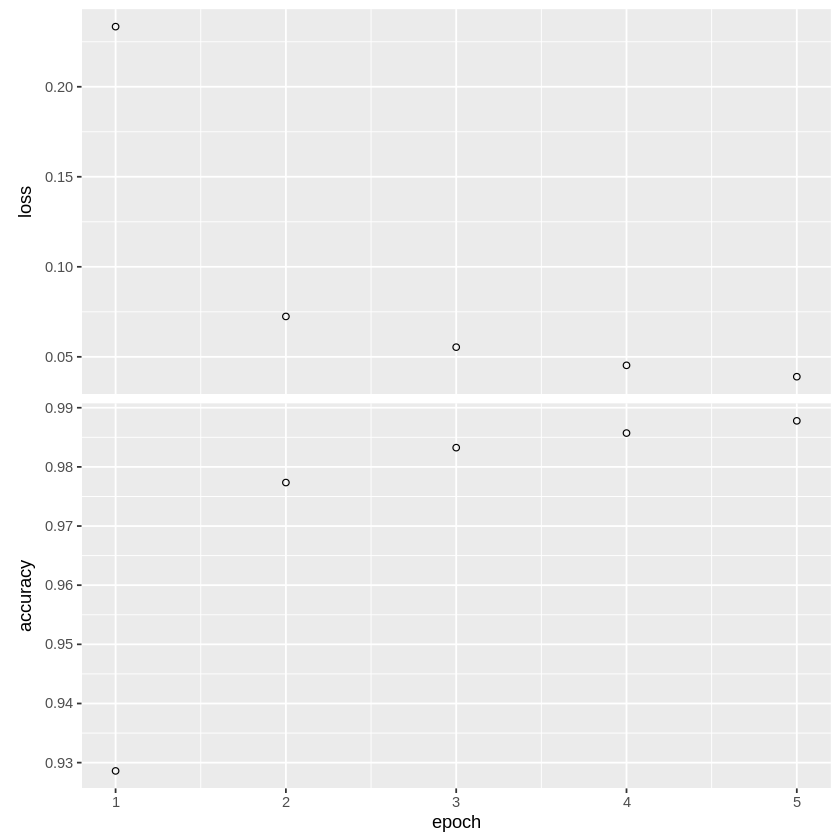

In [34]:
plot(history)